63/63 [==============================] - 200s 3s/step


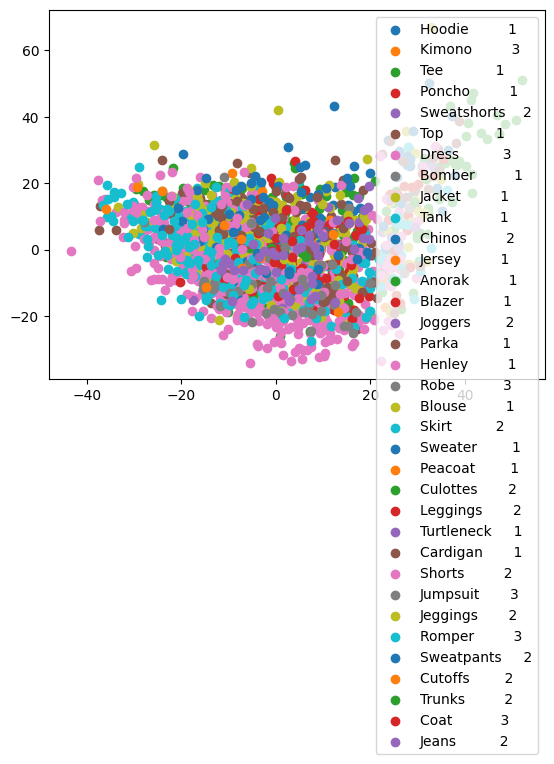

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


def read_txt_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [line.strip() for line in lines]


def generate_features(image_paths):
    images = np.zeros(shape=(len(image_paths), 224, 224, 3))
    pretrained_vgg16 = VGG16(weights="imagenet", include_top=True)
    model = Model(inputs=pretrained_vgg16.input, outputs=pretrained_vgg16.get_layer('fc2').output)
    for i, f in enumerate(image_paths):
        img = image.load_img(f, target_size=(224, 224))
        x_raw = image.img_to_array(img)
        x_expand = np.expand_dims(x_raw, axis=0)
        images[i, :, :, :] = x_expand
    inputs = preprocess_input(images)
    images_features = model.predict(inputs)
    return images_features


root_path = '/Users/user/workspace/personal/practice-mlops/2.build-tensorflow-model/data'
image_paths = read_txt_file(root_path + '/val.txt')
image_paths = [os.path.join(root_path, path) for path in image_paths]

features = generate_features(image_paths)

category_numbers = read_txt_file(root_path + '/val_cate.txt')
category_numbers = [int(num) for num in category_numbers]

category_list = read_txt_file(root_path + '/list_category_cloth.txt')[2:]  # Skip first two lines

categories = [category_list[num-1] for num in category_numbers]  # 1-indexed

# Applying PCA to reduce the features to 2D for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

fig, ax = plt.subplots()

for category in set(categories):
    ix = np.where(np.array(categories) == category)
    ax.scatter(principalComponents[ix, 0], principalComponents[ix, 1], label=category)

ax.legend()
plt.show()